# First, read original data sets.

In [1]:
from os.path import join as path_join
import numpy as np

# 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
DATA_SET_FOLDER = 'sentiment-labelled-sentences'

AMAZON_CELLS_LABELLED = path_join(DATA_SET_FOLDER, 'amazon_cells_labelled.txt')
IMDB_LABELLED = path_join(DATA_SET_FOLDER, 'imdb_labelled.txt')
YELP_LABELLED = path_join(DATA_SET_FOLDER, 'yelp_labelled.txt')

In [2]:
def load(file_name):
    """
    Read txt file line by line and return lines as a list and sentiments as another list.
    """
    with open(file_name, 'r') as f:
        sentences_list = []
        reviews_list = []
        for line in f:
            sentence, review = line.split('\t')[:2]
            # Remove leading and trailing characters, space here.
            sentences_list.append(sentence.strip())
            reviews_list.append(int(review.strip()))
    return sentences_list, reviews_list

In [3]:
amazon_sentences_list, amazon_reviews_list = load(AMAZON_CELLS_LABELLED)

In [4]:
amazon_sentences_list[:10], amazon_reviews_list[:10]

(['So there is no way for me to plug it in here in the US unless I go by a converter.',
  'Good case, Excellent value.',
  'Great for the jawbone.',
  'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  'The mic is great.',
  'I have to jiggle the plug to get it to line up right to get decent volume.',
  'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  'If you are Razr owner...you must have this!',
  'Needless to say, I wasted my money.',
  'What a waste of money and time!.'],
 [0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [5]:
imdb_sentences_list, imdb_reviews_list = load(IMDB_LABELLED)

In [6]:
imdb_sentences_list[:10], imdb_reviews_list[:10]

(['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
  'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
  'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
  'Very little music or anything to speak of.',
  'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.',
  "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",
  'Wasted two hours.',
  'Saw the movie today and thought it was a good effort, good messages for kids.',
  'A bit predictable.',
  'Loved the casting of Jimmy Buffet as the science teacher.'],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [7]:
yelp_sentences_list, yelp_reviews_list = load(YELP_LABELLED)

In [8]:
yelp_sentences_list[:10], yelp_reviews_list[:10]

(['Wow... Loved this place.',
  'Crust is not good.',
  'Not tasty and the texture was just nasty.',
  'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
  'The selection on the menu was great and so were the prices.',
  'Now I am getting angry and I want my damn pho.',
  "Honeslty it didn't taste THAT fresh.)",
  'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
  'The fries were great too.',
  'A great touch.'],
 [1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

# Second, combine all three data sets and split into train and test.

In [9]:
from sklearn.model_selection import train_test_split

raw_X = amazon_sentences_list + imdb_sentences_list + yelp_sentences_list
raw_y = amazon_reviews_list + imdb_reviews_list + yelp_reviews_list

# Randomly split data set into train (70%) and test (30%).
raw_X_train, raw_X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=99)

In [10]:
len(raw_X_train), len(y_train), len(raw_X_test), len(y_test)

(2100, 2100, 900, 900)

In [11]:
raw_X_train[:10], y_train[:10], raw_X_test[:10], y_test[:10]

(['This movie is well-balanced with comedy and drama and I thoroughly enjoyed myself.',
  "The instructions didn't explain that a microphone jack could be used.",
  "If you haven't choked in your own vomit by the end (by all the cheap drama and worthless dialogue) you've must have bored yourself to death with this waste of time.",
  'MANNA FROM HEAVEN is a terrific film that is both predictable and unpredictable at the same time.',
  'We had so much to say about the place before we walked in that he expected it to be amazing, but was quickly disappointed.',
  'Just consider the excellent story, solid acting and look of the film as added bonuses.',
  'Not good by any stretch of the imagination.',
  'Service was fine and the waitress was friendly.',
  'The scallop dish is quite appalling for value as well.',
  "This is hands down the best phone I've ever had."],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
 ['Highly recommend for any one who has a blue tooth phone.',
  'This particular model would n

## Remove non-letters.

In [12]:
# Download nltk corpus whcih includes stop words.
# Running this cell will automatically open a new window.
# Choose 'All Packages' -> 'stopwords' and click 'Download'.
# Finally, close the window.
import nltk
# TODO, uncomment fo first-time run.
# nltk.download()
# Or run 'python -m nltk.downloader stopwords' in shell.

In [13]:
import re
from nltk.corpus import stopwords

def clean_sentence(sentence, return_sentence=True, remove_stopwords=True):
    """
    Transform a sentence to lower case and
    remove non-letters and optionally remove stopwords.
    If return_sentence is True, return sentence as a string.
    Otherwise, return as a list of words.
    """
    # Replace non-letters with white space.
    sentence_no_letters = re.sub('[^a-zA-Z]', ' ', sentence)
    # Convert to lower case.
    sentence_lower_case = sentence_no_letters.lower()
    # Split sentence by white space, tab, newline, return, formfeed.
    words = sentence_lower_case.split()
    if remove_stopwords:
        # Remove stop words. To make things simpler and reduce noise.
        # Try without removing stopwords. Or try stemming!
        udf_stopwords = set(stopwords.words('english'))
    else:
        udf_stopwords = None
    no_stopwords = [word for word in words if not udf_stopwords or word not in udf_stopwords]
    if return_sentence:
        # From list of words to single string.
        return ' '.join(no_stopwords)
    else:
        # Return a list of words
        return no_stopwords


# A simple test.
print(clean_sentence('Deep learning makes NLP more USEFUL! It is True 124.'))
print(clean_sentence('Deep learning makes NLP more USEFUL! It is True 124.',
                     return_sentence=False))
print(clean_sentence('Deep learning makes NLP more USEFUL! It is True 124.',
                     return_sentence=False, remove_stopwords=False))

deep learning makes nlp useful true
['deep', 'learning', 'makes', 'nlp', 'useful', 'true']
['deep', 'learning', 'makes', 'nlp', 'more', 'useful', 'it', 'is', 'true']


# Third, compute bag of words on train set.

In [14]:
from functools import partial

# Transform to lower case and Remove non-letters and stopwords.
# Remove words that are less meaningful 
# It will reduce vocabulary size dramastically.
# However, for logistic regression, it will produce a worse model.
X_train = map(partial(clean_sentence, remove_stopwords=False), raw_X_train)
X_test = map(partial(clean_sentence, remove_stopwords=False), raw_X_test)

X_train[:10], y_train[:10], X_test[:10], y_test[:10]

(['this movie is well balanced with comedy and drama and i thoroughly enjoyed myself',
  'the instructions didn t explain that a microphone jack could be used',
  'if you haven t choked in your own vomit by the end by all the cheap drama and worthless dialogue you ve must have bored yourself to death with this waste of time',
  'manna from heaven is a terrific film that is both predictable and unpredictable at the same time',
  'we had so much to say about the place before we walked in that he expected it to be amazing but was quickly disappointed',
  'just consider the excellent story solid acting and look of the film as added bonuses',
  'not good by any stretch of the imagination',
  'service was fine and the waitress was friendly',
  'the scallop dish is quite appalling for value as well',
  'this is hands down the best phone i ve ever had'],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
 ['highly recommend for any one who has a blue tooth phone',
  'this particular model would not work with my

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Simply leaving the arguments as empty is fine.
vectorizer = CountVectorizer()

# Compute vocabulary of train data and transform it to bag of words.
X_train_bow = vectorizer.fit_transform(X_train)

# Check fitted vocabulary dictionary.
vocabulary = vectorizer.get_feature_names()
vocabulary_size = len(vocabulary)
X_train_bow, vocabulary_size, vocabulary[:6]

(<2100x4054 sparse matrix of type '<type 'numpy.int64'>'
 	with 21866 stored elements in Compressed Sparse Row format>,
 4054,
 [u'aailiyah', u'abhor', u'ability', u'able', u'about', u'above'])

# Fouth, transform test set and fit a classifier.

In [16]:
# Transform test set to bag of words.
X_test_bow = vectorizer.transform(X_test)
# Demonstrate element is count, not occurrence indicator.
X_test_bow, np.max(X_test_bow)

(<900x4054 sparse matrix of type '<type 'numpy.int64'>'
 	with 8452 stored elements in Compressed Sparse Row format>, 8)

## Logistic regression.

In [17]:
# Fit a logistic regression model on train set and make predictions on test data.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')

# Train.
log_reg.fit(X_train_bow, y_train)
pred_train = log_reg.predict(X_train_bow)
pred_prob_train = log_reg.decision_function(X_train_bow)
# Test.
pred_test = log_reg.predict(X_test_bow)
pred_prob_test = log_reg.decision_function(X_test_bow)
print('ground truth, predictions on default threshold, prediction probabilities')
y_test[:20], pred_test[:20].tolist(), pred_prob_test[:20]

ground truth, predictions on default threshold, prediction probabilities


([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
 array([ 1.65828242, -2.63769067,  1.21343956,  4.61733549, -1.25440738,
        -1.43457675,  2.19812722, -3.22527992,  2.49086451,  1.66220455,
         1.80753189,  0.18994867,  1.06550332,  4.57109158,  0.43211265,
        -2.81319491,  0.24646594,  2.15407803, -1.53610767,  2.86696619]))

In [18]:
# Compute classification performance.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
train_auc = roc_auc_score(y_train, pred_prob_train)
test_auc = roc_auc_score(y_test, pred_prob_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, pred_prob_test)

print('Train accuracy on default threshold: {}\narea under curve: {}'.format(train_accuracy, train_auc))
print('Test accuracy on default threshold: {}\narea under curve: {}'.format(test_accuracy, test_auc))

Train accuracy on default threshold: 0.977619047619
area under curve: 0.995706118554
Test accuracy on default threshold: 0.82
area under curve: 0.892611815367


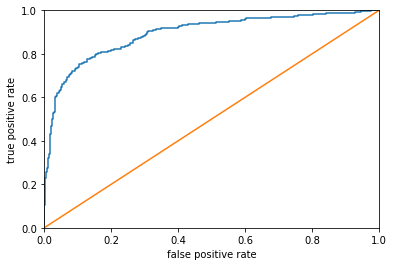

In [19]:
# Plot roc.
import matplotlib.pylab as plt

def plot_auc(fpr, tpr):
    figure, ax = plt.subplots(1)
    ax.plot(fpr, tpr)
    ax.plot([0.0, 1.0], [0.0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    plt.show()

plot_auc(test_fpr, test_tpr)

## Support vector machine.

In [20]:
# Fit an svc model on train set and make predictions on test data.
from sklearn.svm import SVC

svc = SVC(C=5, gamma=0.1, probability=True, decision_function_shape='ovr')

# Train.
svc.fit(X_train_bow, y_train)
pred_train = svc.predict(X_train_bow)
pred_prob_train = svc.decision_function(X_train_bow)
# Test.
pred_test = svc.predict(X_test_bow)
pred_prob_test = svc.decision_function(X_test_bow)
print('ground truth, predictions on default threshold, prediction probabilities')
y_test[:20], pred_test[:20].tolist(), pred_prob_test[:20]

ground truth, predictions on default threshold, prediction probabilities


([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1],
 array([ 0.32125453, -0.90261352,  0.84132678,  1.50155935, -0.3143413 ,
        -0.95283443,  0.19351253, -0.52335077,  0.50071088,  0.94522789,
         0.32869754, -0.19940717, -0.11342933,  0.63613904,  0.07898237,
        -1.31081585,  0.07816099,  0.56349722, -1.10091062,  0.20735569]))

Train accuracy on default threshold: 0.998095238095
area under curve: 1.0
Test accuracy on default threshold: 0.807777777778
area under curve: 0.890888350066


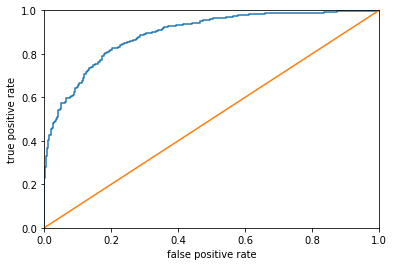

In [21]:
# Compute classification performance.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
train_auc = roc_auc_score(y_train, pred_prob_train)
test_auc = roc_auc_score(y_test, pred_prob_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, pred_prob_test)

print('Train accuracy on default threshold: {}\narea under curve: {}'.format(train_accuracy, train_auc))
print('Test accuracy on default threshold: {}\narea under curve: {}'.format(test_accuracy, test_auc))

plot_auc(test_fpr, test_tpr)

## Neural network.

In [22]:
import tensorflow as tf

# Build computation graph.
with tf.Graph().as_default() as g:
    X = tf.placeholder(tf.float32, shape=[None, vocabulary_size])
    y = tf.placeholder(tf.float32, shape=None)
    with tf.name_scope('hiddel_layer_1'):
        weights = tf.Variable(tf.truncated_normal([vocabulary_size, 1024]))
        weights_reg_loss = tf.reduce_mean(tf.square(weights))
        biases = tf.Variable(tf.zeros([1024]))
        output = tf.matmul(X, weights) + biases
        activation = tf.nn.relu(output)
    
    with tf.variable_scope('softmax'):
        weights = tf.Variable(tf.truncated_normal([1024, 1]))
        weights_reg_loss += tf.reduce_mean(tf.square(weights))
        biases = tf.Variable(0.0)
        final_output = tf.squeeze(tf.matmul(activation, weights), axis=1) + biases
        pred_prob = tf.nn.sigmoid(final_output)
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=final_output), axis=0)
        final_loss = loss + weights_reg_loss * 0.01
    
    init_learning_rate = 0.01
    opt = tf.train.RMSPropOptimizer(init_learning_rate)
    train_op = opt.minimize(final_loss)

    init_op = tf.global_variables_initializer()

# Create a session to invoke computations.
sess = tf.Session(graph=g)

sess.run(init_op)

# From sparse array to dense array.
X_train_bow_arr = X_train_bow.toarray().astype(np.float32)
X_test_bow_arr = X_test_bow.toarray().astype(np.float32)
y_train_arr = np.array(y_train, dtype=np.float32)
y_test_arr = np.array(y_test, dtype=np.float32)

loss_train = []
loss_test = []
auc_train = []
auc_test = []
accuracy_train = []
accuracy_test = []

for step in xrange(1001):
    if step % 100 == 0:
        _, train_loss_val, train_pred_prob_val = sess.run([train_op, loss, pred_prob],
                                                          feed_dict={X: X_train_bow_arr, y: y_train})
        
        loss_train.append(train_loss_val)
        auc_train.append(roc_auc_score(y_train, train_pred_prob_val))
        accuracy_train.append(accuracy_score(y_train, train_pred_prob_val >= 0.5))
        # print('Step: {}, training loss: {}'.format(step, train_loss_val))
        test_loss_val, test_pred_prob_val = sess.run([loss, pred_prob],
                                                      feed_dict={X: X_test_bow_arr, y: y_test})
        loss_test.append(test_loss_val)
        auc_test.append(roc_auc_score(y_test, test_pred_prob_val))
        accuracy_test.append(accuracy_score(y_test, test_pred_prob_val >= 0.5))
        # print('Step: {}, test loss: {}'.format(step, test_loss_val))
    else:
        _ = sess.run(train_op, feed_dict={X: X_train_bow_arr, y: y_train})

# Make some simple statistics.
min_loss_test = min(loss_test)
min_loss_test_idx = loss_test.index(min_loss_test)
max_auc_test = max(auc_test)
max_auc_test_idx = auc_test.index(max_auc_test)
max_accuracy_test = max(accuracy_test)
max_accuracy_test_idx = accuracy_test.index(max_accuracy_test)
print('Minimum test loss {} at step {}, and training loss {}'.format(min_loss_test,
                                                                     100 * min_loss_test_idx,
                                                                     loss_train[min_loss_test_idx]))
print('Maximal test auc {} at step {}, and training auc {}'.format(max_auc_test,
                                                                  100 * max_auc_test_idx,
                                                                  auc_train[max_auc_test_idx]))
print('Maximal test accuracy {} at step {}, and training accuracy {}'.format(max_accuracy_test,
                                                                             100 * max_accuracy_test_idx,
                                                                             accuracy_train[max_accuracy_test_idx]))

Minimum test loss 2.29713225365 at step 1000, and training loss 6.10517236055e-06
Maximal test auc 0.850016543292 at step 1000, and training auc 1.0
Maximal test accuracy 0.773333333333 at step 1000, and training accuracy 1.0


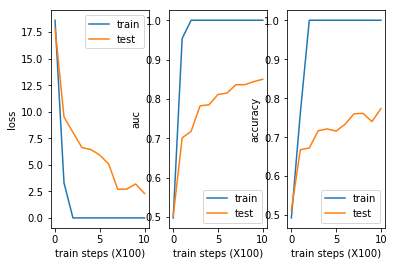

In [23]:
def plots(loss_train, loss_test, auc_train, auc_test, accuracy_train, accuracy_test):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
    # Plot loss.
    ax1.plot(loss_train, label='train')
    ax1.plot(loss_test, label='test')
    ax1.legend()
    ax1.set_ylabel('loss')
    ax1.set_xlabel('train steps (X100)')
    # Plot auc.
    ax2.plot(auc_train, label='train')
    ax2.plot(auc_test, label='test')
    ax2.legend()
    ax2.set_ylabel('auc')
    ax2.set_xlabel('train steps (X100)')
    # Plot accuracy.
    ax3.plot(accuracy_train, label='train')
    ax3.plot(accuracy_test, label='test')
    ax3.legend()
    ax3.set_ylabel('accuracy')
    ax3.set_xlabel('train steps (X100)')

    plt.show()

plots(loss_train, loss_test, auc_train, auc_test, accuracy_train, accuracy_test)

# Fifth, make use of Word2Vec

## Countinuous bag of words or predictive word embedding.

In [24]:
from functools import partial
import pprint


# Map sentences to words.
X_train_words = map(partial(clean_sentence, return_sentence=False, remove_stopwords=True), raw_X_train)
X_test_words = map(partial(clean_sentence, return_sentence=False, remove_stopwords=True), raw_X_test)

pp = pprint.PrettyPrinter(indent=1, width=120)
pp.pprint(X_train_words[:2])
pp.pprint(X_test_words[:2])

[['movie', 'well', 'balanced', 'comedy', 'drama', 'thoroughly', 'enjoyed'],
 ['instructions', 'explain', 'microphone', 'jack', 'could', 'used']]
[['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'],
 ['particular', 'model', 'would', 'work', 'motorola', 'q', 'smartphone']]


In [25]:
from gensim.models.word2vec import Word2Vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# sg, 0 for countinuous bag of words, 1 for skip-gram which works better for logistic regression here.
model = Word2Vec(sentences=X_train_words, size=300, window=5, min_count=1,
                 max_vocab_size=None, sample=0.001, workers=4,
                 min_alpha=0.0001, sg=1, hs=0, negative=20, cbow_mean=1,
                 iter=20, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=1000)

# syn0 is a numpy array that stores a feature vector for each word.
model.wv.syn0.shape

2017-06-13 21:32:15,890 : INFO : collecting all words and their counts
2017-06-13 21:32:15,891 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-06-13 21:32:15,898 : INFO : collected 3939 word types from a corpus of 12474 raw words and 2100 sentences
2017-06-13 21:32:15,899 : INFO : Loading a fresh vocabulary
2017-06-13 21:32:15,913 : INFO : min_count=1 retains 3939 unique words (100% of original 3939, drops 0)
2017-06-13 21:32:15,914 : INFO : min_count=1 leaves 12474 word corpus (100% of original 12474, drops 0)
2017-06-13 21:32:15,933 : INFO : deleting the raw counts dictionary of 3939 items
2017-06-13 21:32:15,935 : INFO : sample=0.001 downsamples 38 most-common words
2017-06-13 21:32:15,936 : INFO : downsampling leaves estimated 11579 word corpus (92.8% of prior 12474)
2017-06-13 21:32:15,937 : INFO : estimated required memory for 3939 words and 300 dimensions: 11423100 bytes
2017-06-13 21:32:15,947 : INFO : resetting layer weights
2017-06-13 21:32:16,

(3939, 300)

In [26]:
model['phone'].shape, model['phone'][:10]

((300,),
 array([ 0.12181101, -0.04280083, -0.21245392, -0.11450065,  0.05007749,
        -0.12880118, -0.06752747, -0.19197069,  0.08410849, -0.01657801], dtype=float32))

In [27]:
# This doesn't make much sense.
model.similarity('phone', 'good')

0.99292146561030181

# Transform sentence words to dense vector.

## Represent a sentence as mean of the vectors of its words.

In [28]:
# First method - averaging words vectors.
def ws2meanvec(words, embedding_model):
    """
    Compute mean vector of a list of words.
    """
    vectors = [embedding_model[w] for w in words if w in embedding_model]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        # To avoid empty words causing error. For example, raw sentence is 10/10 at imdb.
        return np.zeros(embedding_model.vector_size, dtype=np.float32)

ws2meanvec(['phone', 'good', 'work'], model).shape

(300,)

In [29]:
X_train_cbow = map(partial(ws2meanvec, embedding_model=model), X_train_words)
X_test_cbow = map(partial(ws2meanvec, embedding_model=model), X_test_words)
X_train_cbow[0][:10], X_test_cbow[0][:10]

(array([ 0.15610416, -0.05606126, -0.2159145 , -0.12296281,  0.05785468,
        -0.10106085, -0.06802104, -0.18052582,  0.08882451, -0.00321173], dtype=float32),
 array([ 0.161189  , -0.04263185, -0.22173673, -0.12244137,  0.05912674,
        -0.11804243, -0.07963934, -0.18222256,  0.09119293,  0.01295353], dtype=float32))

In [30]:
# Some test sentences don't have a word in the vocabulary.
ensure_no_error = [len(e) for e in X_train_cbow]

In [31]:
# Fit a logistic regression model on train set and make predictions on test data.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=10)

# Train.
log_reg.fit(X_train_cbow, y_train)
# Test.
pred_test = log_reg.predict(X_test_cbow)
pred_prob_test = log_reg.decision_function(X_test_cbow)
print('ground truth, predictions on default threshold, prediction probabilities')
y_test[:20], pred_test[:20].tolist(), pred_prob_test[:20]

ground truth, predictions on default threshold, prediction probabilities


([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 array([ 0.26391771,  0.28913893,  0.36542769,  1.85804354,  0.43771857,
         0.59934859,  0.0592134 , -0.11441425,  0.06177486, -0.03211928,
         0.13187559, -0.15628349, -0.25878999, -0.03729056, -0.37299931,
        -0.93954224,  0.45756042,  0.07359714, -0.29783902,  0.07049611]))

accuracy on default threshold: 0.621111111111
area under curve: 0.687065121309


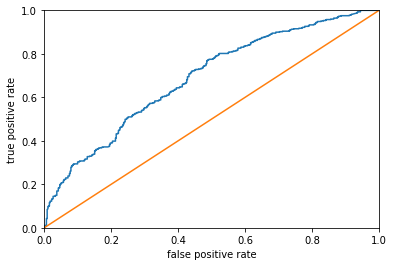

In [32]:
# Compute classification performance.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, pred_test)

auc = roc_auc_score(y_test, pred_prob_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_test)

print('accuracy on default threshold: {}\narea under curve: {}'.format(accuracy, auc))

plot_auc(fpr, tpr)

## Let's try transfer learning

In [33]:
from gensim.models import KeyedVectors

# Load google pre-trained model.
# From http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/
google_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
google_model.syn0.shape

2017-06-13 21:32:18,503 : INFO : loading projection weights from ./GoogleNews-vectors-negative300.bin.gz
2017-06-13 21:35:31,265 : INFO : loaded (3000000, 300) matrix from ./GoogleNews-vectors-negative300.bin.gz


(3000000, 300)

In [34]:
google_model.similarity('phone', 'good')

0.074366691017249367

In [35]:
google_model.most_similar('king')

2017-06-13 21:35:31,280 : INFO : precomputing L2-norms of word weight vectors


[(u'kings', 0.7138045430183411),
 (u'queen', 0.6510956287384033),
 (u'monarch', 0.6413193941116333),
 (u'crown_prince', 0.6204220056533813),
 (u'prince', 0.6159994006156921),
 (u'sultan', 0.5864824056625366),
 (u'ruler', 0.5797566771507263),
 (u'princes', 0.5646552443504333),
 (u'Prince_Paras', 0.543294370174408),
 (u'throne', 0.5422105193138123)]

In [36]:
google_model.most_similar('university')

[(u'universities', 0.7003918886184692),
 (u'faculty', 0.6780906915664673),
 (u'unversity', 0.6758289933204651),
 (u'undergraduate', 0.6587094068527222),
 (u'univeristy', 0.6585439443588257),
 (u'campus', 0.6434986591339111),
 (u'college', 0.638526976108551),
 (u'academic', 0.6317198276519775),
 (u'professors', 0.6298649311065674),
 (u'undergraduates', 0.6149813532829285)]

#### Represent a sentence as mean of the vectors of its words.

In [37]:
# Remove stopwords or not, please check previous cells.
X_train_tl = np.array(map(partial(ws2meanvec, embedding_model=google_model), X_train_words))
X_test_tl = np.array(map(partial(ws2meanvec, embedding_model=google_model), X_test_words))
X_train_tl[0][:10], X_test_tl[0][:10]

(array([-0.03456334,  0.0370745 , -0.11201695,  0.16207449, -0.00889369,
        -0.02577427,  0.01097979,  0.00630406,  0.07080078,  0.00959996], dtype=float32),
 array([-0.01264445, -0.08089193,  0.04174805,  0.01407878, -0.16902669,
         0.03644816,  0.06310526, -0.10062663,  0.11686198,  0.01391602], dtype=float32))

In [38]:
# Fit a logistic regression model on train set and make predictions on test data.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')

# Train.
log_reg.fit(X_train_tl, y_train)
# Test.
pred_test = log_reg.predict(X_test_tl)
pred_prob_test = log_reg.decision_function(X_test_tl)
print('ground truth, predictions on default threshold, prediction probabilities')
y_test[:20], pred_test[:20].tolist(), pred_prob_test[:20]

ground truth, predictions on default threshold, prediction probabilities


([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 array([ 1.10976065,  0.57030594,  2.54076074,  3.00765064, -0.3820346 ,
        -0.26290903, -0.25651127, -3.05186962,  1.99199124,  2.74571328,
         0.39430714, -0.89937996, -0.55053778,  2.9119668 , -2.02392607,
        -2.53171542,  1.31356882,  2.44599221, -3.08721885, -0.87593437]))

accuracy on default threshold: 0.82
area under curve: 0.903888414264


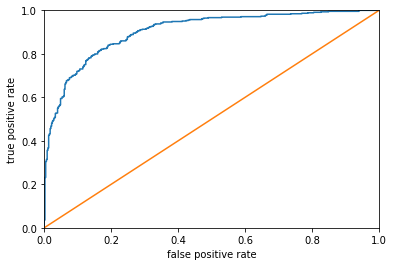

In [39]:
# Compute classification performance.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, pred_test)

auc = roc_auc_score(y_test, pred_prob_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_test)

print('accuracy on default threshold: {}\narea under curve: {}'.format(accuracy, auc))

plot_auc(fpr, tpr)

## Support vector machine.

In [40]:
# Fit an svc model on train set and make predictions on test data.
from sklearn.svm import SVC

svc = SVC(C=1.0, gamma=0.1, probability=True, decision_function_shape='ovr')

# Train.
svc.fit(X_train_tl, y_train)
pred_train = svc.predict(X_train_tl)
pred_prob_train = svc.decision_function(X_train_tl)
# Test.
pred_test = svc.predict(X_test_tl)
pred_prob_test = svc.decision_function(X_test_tl)
print('ground truth, predictions on default threshold, prediction probabilities')
y_test[:20], pred_test[:20].tolist(), pred_prob_test[:20]

ground truth, predictions on default threshold, prediction probabilities


([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
 array([ 0.788459  ,  0.26117121,  1.69120277,  2.17865987, -0.05390308,
        -0.25132504, -0.11454365, -1.73419407,  1.08987599,  1.55242931,
         0.30301341, -0.56123168, -0.41550107,  1.59683295, -1.46200424,
        -1.35474506,  0.58426006,  1.0485971 , -1.88305036, -0.64584004]))

Train accuracy on default threshold: 0.857619047619
area under curve: 0.928112406451
Test accuracy on default threshold: 0.827777777778
area under curve: 0.906490896251


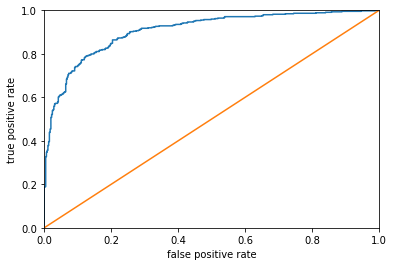

In [41]:
# Compute classification performance.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
train_auc = roc_auc_score(y_train, pred_prob_train)
test_auc = roc_auc_score(y_test, pred_prob_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, pred_prob_test)

print('Train accuracy on default threshold: {}\narea under curve: {}'.format(train_accuracy, train_auc))
print('Test accuracy on default threshold: {}\narea under curve: {}'.format(test_accuracy, test_auc))

plot_auc(test_fpr, test_tpr)